### Exercises week 35
This notebook takes a lot of inspiration from the notes: https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter1.html

# Exercise 1

### Part 1
$$
    \frac{\partial a^Tx}{x} \in \mathbb{R}^n
$$
$$
    a^Tx \in \mathbb{R}
$$
$$
    a^Tx = \sum_{i=0}^{n-1}a_ix_i
$$

$$
    (a^Tx)_n = a_nx_n
$$
Using the definition of the Jacobian (if $a^Tx$ is a scalar, the result will be a $1\times n$ vector):
$$
    \frac{\partial a^Tx}{x} = [a_0, a_1,...,a_{n-1}] = \underline{\underline{a^T}}
$$

### Part 2
We define $\alpha$ as:
$$
    \alpha = a^TAa
$$
where we assume $a\in\mathbb{R}^n$ and $A\in\mathbb{R}^{n\times n}$
This can be written as a sum in the form of:
$$
    a^TAa = \sum_{i=0}^{n-1}x_i\sum_{j=0}^{n-1}a_{ij}x_j = \sum_{i=0}^{n-1}\sum_{j=0}^{n-1}x_ia_{ij}x_j
$$
Written out in matrix notation, this would look like:
$$
    \begin{bmatrix}
        x_0 & x_1 & \dots & x_{n-1}
    \end{bmatrix}
    \begin{bmatrix}
        a_{00} & a_{01} & \dots & a_{0n} \\
        a_{10} & a_{11} & \dots & \vdots \\
        \vdots & \vdots & \ddots & \vdots \\
        a_{n0} & a_{n1} & \dots & a_{nn}
    \end{bmatrix}
    \begin{bmatrix}
        x_0 \\ 
        x_1 \\ 
        \vdots \\ 
        x_{n-1}
    \end{bmatrix}
$$
Which is the same as:
$$
    x_0(x_0a_{00} + ... + x_na_{0n}) + x_1(x_0a_{10} + ... + x_na_{1n}) + ... + x_n(x_0a_{n0} + ... + x_na{nn})
$$
Taking the partial derivative of this expression with respect to $x_k$ gives us:
$$
    \frac{\partial \alpha}{\partial a_k} = \sum_{i=0}^{n-1}x_ia_{ik} + \sum_{j=0}^{n-1}x_ja_{kj}
$$

Which is the same as 
$$
    \underline{\underline{a^T(A^T+A)}}
$$


### Part 3
$$
    \frac{\partial (x-As)^T(x-As)}{\partial s} \in \mathbb{R}^n
$$
Using $(x-As) = \alpha$, where $\alpha$ depends on $s$, we can rewrite the expression as
$$
    (x-As)^T(x-As) = \alpha^T\alpha
$$
where we define the scalar $\beta = \alpha^T\alpha = \sum_{i=0}^{n-1}\alpha_i\alpha_i$.
Using the product rule, we can define the partial derivative of $s_k$ as:
$$
    \frac{\partial \beta}{\partial s_k} = \sum_{i=0}^{n-1}\alpha_i\frac{\partial\alpha_i}{\partial s_k} + \alpha_i\frac{\partial\alpha_i}{\partial s_k} = 2 \sum_{i=0}^{n-1}\alpha_i\frac{\partial\alpha_i}{\partial s_k}
$$
This gives:
$$
    \frac{\partial \beta}{\partial s} = 2 \alpha^T\frac{\partial\alpha}{\partial s}
$$

The partial derivative $\frac{\partial\alpha}{\partial s}$ gives:
$$
    \frac{\partial\alpha}{\partial s} = \frac{\partial (x - As)}{\partial s} = \frac{\partial (x)}{\partial s} - \frac{\partial (As)}{\partial s} = -A
$$

This means the expression is given by:
$$
    \frac{\partial (x-As)^T(x-As)}{\partial s} = \underline{\underline{-2(x-As)^TA}}
$$


### Part 4
$$
    \frac{\partial (-2(x-As)^TA)}{\partial s} = -2\frac{\partial ((x-As)^TA)}{\partial s} = -2\frac{\partial (A^T(x-As))}{\partial s}
$$

Using the product rule for the expression we get:
$$
    -2 \Bigl[ \frac{\partial (A^T)}{\partial s}(x-As) + \frac{\partial (x-As)}{\partial s} A^T \Bigr] 
$$
As $\frac{\partial (A^T)}{\partial s} = 0$, the left side of the expression evaluates to $0$, meaning the expression evaluates to:
$$
    -2 \frac{\partial (x-As)}{\partial s} A^T
$$
From the previous part we showed $\frac{\partial (x - As)}{\partial s} = -A$, meaning the expression is the same as:
$$
    (-2) (-A) A^T = \underline{\underline{2AA^T}}
$$

___

# Exercise 2

In [178]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.rand(100,1)
y = 2.0+5*x*x+0.1*np.random.randn(100,1)


### Task 1
Task: "_Write your own code (following the examples under the regression notes) for computing the parametrization of the data set fitting a second-order polynomial._"

- This code uses the vander function to create a vandermonde matrix $\in \mathbb{R}^{100x3}$
- Then uses the formula $\beta = (X^TX)^{-1}X^Ty$ to get the beta parameters
- The x array is sorted to give a prettier plot
- A loop is used to iterate over every beta parameter $\beta$ to calculate the output for the polynomial at every value x

[[ 5.03374697]
 [-0.07757866]
 [ 2.0302651 ]]


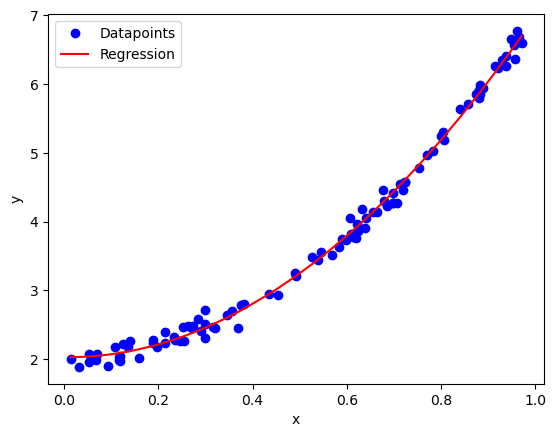

In [179]:
x = x.flatten()

# 2nd order polynomial, so we need a vandermonde matrix in the dimension R^nx3 (n=100)
X = np.vander(x, 3)
beta = np.linalg.inv(np.matmul((np.transpose(X)), X))@X.T@y
print(beta)

y_plt = np.zeros(100)
x_plt = x
x_plt = np.sort(x_plt)

for i in range(len(beta)):
    y_plt += beta[i][0] * x_plt**(len(beta)-(i+1))

fig, ax = plt.subplots()

ax.plot(x,y, "bo", label="Datapoints")
ax.plot(x_plt,y_plt, "r-", label="Regression")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

### Task 2
Task: "_Use thereafter scikit-learn (see again the examples in the slides for week 35) and compare with your own code. Note here that scikit-learn does not include, by default, the intercept. See the discussions on scaling your data in the slides for this week. This type of problems appear in particular if we fit a polynomial with an intercept._"

This code does a regression using sklearn, based on the notes: https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter1.html

[[-0.07757866  5.03374697]]
[2.0302651]


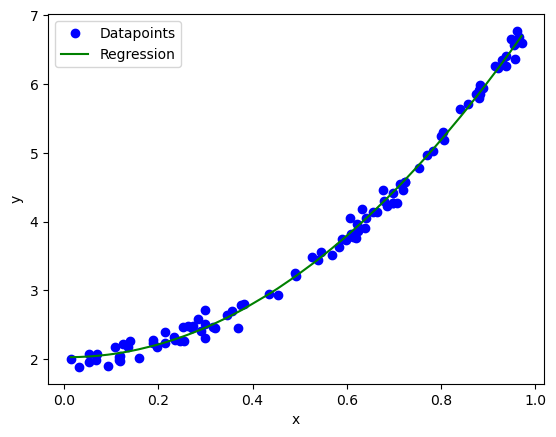

In [180]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

poly2 = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly2.fit_transform(x.reshape(-1, 1))
lin_reg = LinearRegression()
lin_reg.fit(poly_features, y)
y_predicted = lin_reg.predict(poly_features)

print(lin_reg.coef_)
print(lin_reg.intercept_)
beta_sk = lin_reg.coef_[0]

x_plot = x_plt

f = x_plot**2 * beta_sk[1] + x_plot * beta_sk[0] + lin_reg.intercept_

fig, ax = plt.subplots()

ax.plot(x, y, 'bo', label="Datapoints")
ax.plot(x_plot, f, 'g-', label="Regression")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

### Task 3
Task: "_Using scikit-learn, compute also the mean squared error, a risk metric corresponding to the expected value of the squared (quadratic) error defined as_
$$
    MSE(y, \tilde{y}) = \frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$
_and the $R^2$ score function. If $\tilde{y}_i$ is the predicted value of the $i - th$ sample and is the corresponding true value, then the score $R^2$ is defined as_
$$
R^2(y,\tilde{y}) = 1 - \frac{\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y})^2}
$$
_where we have defined the mean value of $y$ as_
$$
\bar{y} = \frac{1}{n}\sum_{i=0}^{n-1}y_i
$$
_You can use the functionality included in scikit-learn. If you feel for it, you can use your own program and define functions which compute the above two functions. Discuss the meaning of these results. Try also to vary the coefficient in front of the added stochastic noise term and discuss the quality of the fits._"

In [181]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)
print("Mean square error:\t " + str(mse))
print("r2 score:\t\t", str(r2))

Mean square error:	 0.009686965131108276
r2 score:		 0.9958391388291166


In [182]:
# Custom mse and r2 implementations :D
ytilde = X@beta

def fun_mse(y, y_predicted):
    mse = 0
    for i in range(len(y)):
        mse += (y[i] - y_predicted[i])**2
    return mse / len(y)

def fun_r2(y, y_predicted):
    r_0 = 0
    r_1 = 0
    y_avg = np.mean(y)
    for i in range(len(y)):
        r_0 += (y[i]-y_predicted[i])**2
        r_1 += (y[i]-y_avg)**2
    return 1 - (r_0/r_1)

mse_custom = fun_mse(y, ytilde)
r2_custom = fun_r2(y, ytilde)
print("Custom MSE function: " + str(mse_custom))
print("Custom R2 function: " + str(r2_custom))

Custom MSE function: [0.00968697]
Custom R2 function: [0.99583914]


# Exercise 3

In [183]:
np.random.seed()
n = 100
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

### Task a
Task: "_Write a first code which sets up a design matrix defined by a fifth-order polynomial and split your data set in training and test data._"

In [184]:
from sklearn.model_selection import train_test_split

x = x.flatten()
X = np.vander(x, 6)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

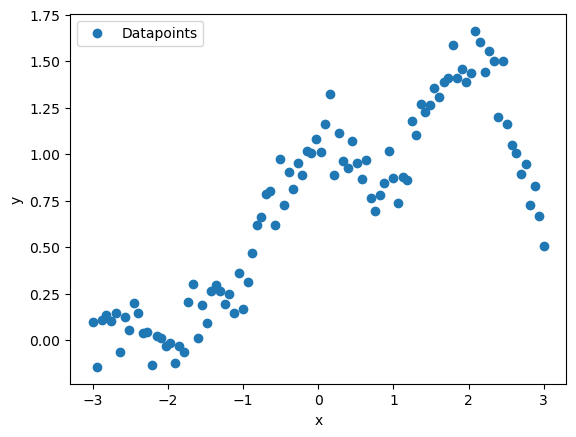

In [185]:
fig, ax = plt.subplots()
ax.plot(x,y, "o", label="Datapoints")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

### Task b
Task: "_Write thereafter (using either scikit-learn or your matrix inversion code using for example numpy) and perform an ordinary least squares fitting and compute the mean squared error for the training data and the test data. These calculations should apply to a model given by a fifth-order polynomial. If you compare your own code with scikit_learn, not that the latter does not include by default the intercept. See the discussions on scaling your data in the slides for this week._"

In [186]:
# Custom function for regression for an n degree polynomial
def regression(x, y, degree):
    if np.ndim(x) == 1:
        x = x.flatten()
        X = np.vander(x, degree+1)
    elif np.ndim(x) == 2:
        X = x
    else: 
        return
    
    beta = beta = np.linalg.inv(np.matmul((np.transpose(X)), X))@X.T@y
    ytilde = X@beta
    return beta, ytilde

beta_train, ytilde_train = regression(X_train, y_train, 5)
#beta_test, ytilde_test = regression(X_test, y_test, 5)

mse_train = fun_mse(y_train, ytilde_train)
y_pred = X_test@beta_train
mse_test = fun_mse(y_test, y_pred)

r2_train = fun_r2(y_train, ytilde_train)
r2_test = fun_r2(y_test, y_pred)

print("MSE training: " + str(mse_train))
print("MSE test: " + str(mse_test))

print("R2 training: " + str(r2_train))
print("R2 test: " + str(r2_test))

MSE training: [0.02700618]
MSE test: [0.05318408]
R2 training: [0.89013557]
R2 test: [0.82981131]


[0.0090432]


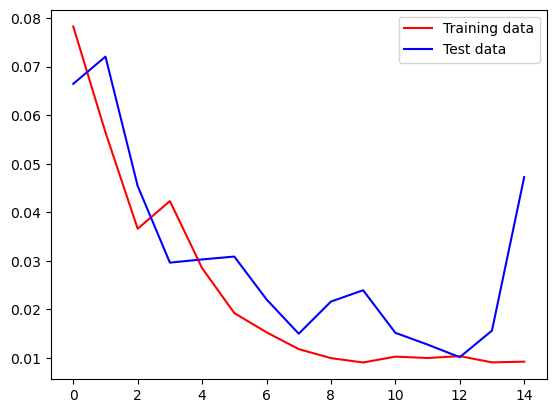

In [187]:
def regression_comparison(x, y, degree):
    mse_train = []
    mse_test = []
    
    for i in range(1, degree+1):
        X = np.vander(x.flatten(), i+1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        beta, ytilde_train = regression(X_train,y_train,i+1)
        mse_train.append(fun_mse(y_train, ytilde_train))
        y_pred = X_test@beta
        mse_test.append(fun_mse(y_test, y_pred))

    return mse_train, mse_test

train, test = regression_comparison(x,y,15)
print(min(train))
# print(np.where(train == min(train)))
fig, ax = plt.subplots()

ax.plot(train, "r-", label="Training data")
ax.plot(test, "b-", label="Test data")
ax.legend()
plt.show()
